In [24]:
import numpy as np
from astropy.io import fits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

Generated star_1.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_2.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_3.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_4.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_5.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_6.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_7.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_8.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_9.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_10.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_11.fits in C:\Users\Pearl Narang/My Practice/advanced_synthetic_data\star
Generated star_12.fits in C:\U

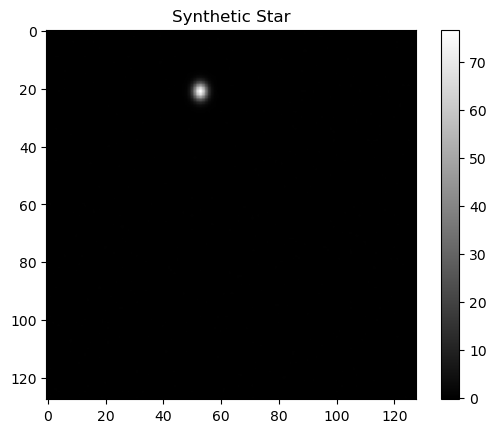

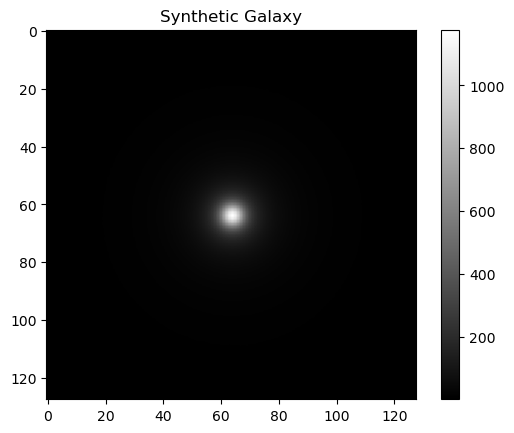

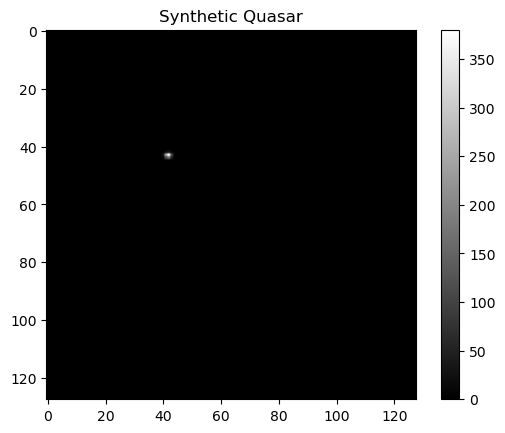

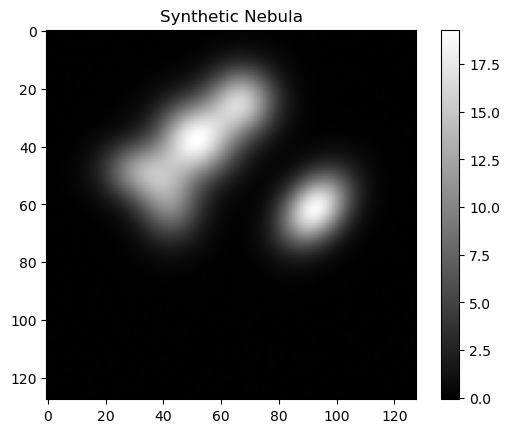

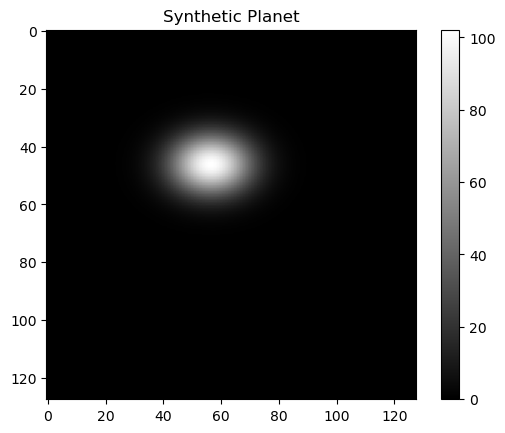

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling.models import Sersic1D, Gaussian2D
from astropy.convolution import convolve, Gaussian2DKernel

# Utility function to add noise
def add_noise(data, noise_level=0.05):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Generate star (Point source)
def generate_star(image_size=(128, 128)):
    data = np.zeros(image_size)
    amplitude = np.random.uniform(10, 100)
    x_mean = np.random.uniform(20, 100)
    y_mean = np.random.uniform(20, 100)
    x_stddev = np.random.uniform(1, 3)
    y_stddev = np.random.uniform(1, 3)
    star = Gaussian2D(amplitude=amplitude, x_mean=x_mean, y_mean=y_mean, x_stddev=x_stddev, y_stddev=y_stddev)
    y, x = np.mgrid[:image_size[0], :image_size[1]]
    data += star(x, y)
    return add_noise(data)

# Generate galaxy (Sersic profile)
def generate_galaxy(image_size=(128, 128)):
    data = np.zeros(image_size)
    amplitude = np.random.uniform(10, 100)
    r_eff = np.random.uniform(10, 30)  # Effective radius
    n = np.random.uniform(1, 4)  # Sersic index
    galaxy = Sersic1D(amplitude=amplitude, r_eff=r_eff, n=n)
    y, x = np.mgrid[:image_size[0], :image_size[1]]
    r = np.sqrt((x - image_size[0]//2)**2 + (y - image_size[1]//2)**2)
    data += galaxy(r)
    kernel = Gaussian2DKernel(x_stddev=np.random.uniform(1, 3))
    data = convolve(data, kernel)
    return add_noise(data)

# Generate quasar (Bright point source)
def generate_quasar(image_size=(128, 128)):
    data = np.zeros(image_size)
    amplitude = np.random.uniform(100, 500)
    x_mean = np.random.uniform(40, 60)
    y_mean = np.random.uniform(40, 60)
    x_stddev = np.random.uniform(0.5, 1.5)
    y_stddev = np.random.uniform(0.5, 1.5)
    quasar = Gaussian2D(amplitude=amplitude, x_mean=x_mean, y_mean=y_mean, x_stddev=x_stddev, y_stddev=y_stddev)
    y, x = np.mgrid[:image_size[0], :image_size[1]]
    data += quasar(x, y)
    return add_noise(data, noise_level=0.01)

# Generate nebula (Diffuse structure)
def generate_nebula(image_size=(128, 128)):
    data = np.zeros(image_size)
    for _ in range(5):
        amplitude = np.random.uniform(5, 20)
        x_mean = np.random.uniform(10, 120)
        y_mean = np.random.uniform(10, 120)
        x_stddev = np.random.uniform(5, 10)
        y_stddev = np.random.uniform(5, 10)
        theta = np.random.uniform(0, 360)
        nebula = Gaussian2D(amplitude=amplitude, x_mean=x_mean, y_mean=y_mean, x_stddev=x_stddev, y_stddev=y_stddev, theta=np.deg2rad(theta))
        y, x = np.mgrid[:image_size[0], :image_size[1]]
        data += nebula(x, y)
    return add_noise(data, noise_level=0.02)

# Generate planet (Disk-like structure)
def generate_planet(image_size=(128, 128)):
    data = np.zeros(image_size)
    amplitude = np.random.uniform(50, 200)
    x_mean = np.random.uniform(40, 60)
    y_mean = np.random.uniform(40, 60)
    x_stddev = np.random.uniform(5, 10)
    y_stddev = np.random.uniform(5, 10)
    planet = Gaussian2D(amplitude=amplitude, x_mean=x_mean, y_mean=y_mean, x_stddev=x_stddev, y_stddev=y_stddev)
    y, x = np.mgrid[:image_size[0], :image_size[1]]
    data += planet(x, y)
    return add_noise(data, noise_level=0.01)

# Save data to FITS file
def save_fits(data, folder, filename, object_type):
    os.makedirs(folder, exist_ok=True)
    filepath = os.path.join(folder, filename)
    hdu = fits.PrimaryHDU(data)
    hdu.header['OBJECT'] = object_type
    hdu.writeto(filepath, overwrite=True)

# Set the directory to save all data
output_dir = os.path.expanduser('~/My Practice/advanced_synthetic_data')

# Generate and save the dataset
object_types = ['star', 'galaxy', 'quasar', 'nebula', 'planet']
generate_functions = [generate_star, generate_galaxy, generate_quasar, generate_nebula, generate_planet]

# Number of images per class
num_images_per_class = 250

# Create 250 samples for each object type and save in a combined folder
for obj_type, gen_func in zip(object_types, generate_functions):
    folder = os.path.join(output_dir, obj_type)  # Each object type has its subfolder
    for i in range(num_images_per_class):
        data = gen_func()
        filename = f"{obj_type}_{i+1}.fits"
        save_fits(data, folder, filename, obj_type)
        print(f"Generated {filename} in {folder}")

# Optional: Visualize a sample from each type
for obj_type, gen_func in zip(object_types, generate_functions):
    data = gen_func()
    plt.figure()
    plt.imshow(data, cmap='gray')
    plt.title(f'Synthetic {obj_type.capitalize()}')
    plt.colorbar()
    plt.show()


In [26]:
# Step 1: Load and preprocess FITS files
def load_fits_file():
    hdul = fits.open(advanced_synthetic_data)
    image_data = hdul[0].data
    hdul.close()
    return image_data

def preprocess_image(image_data, target_shape=(128, 128)):
    # Normalize and resize the image
    from skimage.transform import resize
    normalized_image = image_data / np.max(image_data)
    resized_image = resize(normalized_image, target_shape)
    return resized_image

In [27]:
def load_fits_from_directory_fits(directory_fits_path, image_name):
    try:
        with fits.open(directory_fits_path) as hdul:
            # Assuming the FITS file contains a list of HDUs
            for hdu in hdul:
                if image_name in hdu.header.get('EXTNAME', ''):
                    return hdu.data
        print(f"Image {image_name} not found in {directory_fits_path}")
        return None
    except FileNotFoundError:
        print(f"Directory FITS file not found: {directory_fits_path}")
        return None

In [44]:
import os
import numpy as np
from astropy.io import fits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Function to load FITS file from a path
def load_fits_file(file_path):
    try:
        with fits.open(file_path) as hdul:
            return hdul[0].data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

def preprocess_image(image_data, target_shape=(128, 128)):
    from skimage.transform import resize
    if image_data is None:
        return np.zeros(target_shape)
    normalized_image = image_data / np.max(image_data)  # Normalize between 0 and 1
    resized_image = resize(normalized_image, target_shape, anti_aliasing=True)
    return resized_image

# Load dataset from directories containing FITS files
def load_dataset_from_directories(dataset_dir, labels, num_images_per_class, target_shape=(128, 128)):
    images = []
    image_labels = []
    
    for label in labels:
        label_dir = os.path.join(dataset_dir, label)
        if not os.path.isdir(label_dir):
            print(f"Label directory not found: {label_dir}")
            continue
        
        files = [f for f in os.listdir(label_dir) if f.endswith('.fits')]
        if len(files) < num_images_per_class:
            print(f"Not enough FITS files in {label_dir}. Found {len(files)} files.")
            continue
        
        for i in range(num_images_per_class):
            file_path = os.path.join(label_dir, files[i])
            image_data = load_fits_file(file_path)
            processed_image = preprocess_image(image_data, target_shape)
            images.append(processed_image)
            image_labels.append(label)
    
    images = np.array(images)
    image_labels = np.array(image_labels)
    
    return images, image_labels

# Define your dataset directory and class labels
dataset_dir = 'advanced_synthetic_data'
labels = ['galaxy', 'quasar', 'nebula', 'planet','star']
num_images_per_class = 250
test_set_dir= "advanced_synthetic_data_test"
test_labels=['galaxy','quasar','nebula','planet','star']

# Load images and labels
images, image_labels = load_dataset_from_directories(dataset_dir, labels, num_images_per_class)
test_images,test_labels=load_dataset_from_directories(test_set_dir,test_labels,num_images_per_class)

# Add channel dimension (grayscale image requires shape (128, 128, 1))
images = np.expand_dims(images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
labels_one_hot = lb.fit_transform(image_labels)
test_labels = lb.transform(test_labels)

# Split the data into train and test sets
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels_one_hot, test_size=0.2, random_state=42)

print("Dataset loaded and split into training and testing sets!")
print(f"Training set size: {train_images.shape}")
print(f"Validation set size: {_images.shape}")
print(f"Test set size: {test_images.shape}")

Dataset loaded and split into training and testing sets!
Training set size: (1000, 128, 128, 1)
Validation set size: (1250, 128, 128, 1)


In [38]:
# Step 2: Create the CNN model with hyperparameters
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),  # Dropout layer to prevent overfitting
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),  # Dropout layer to prevent overfitting
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),  # Dropout layer to prevent overfitting
        Dense(5, activation='softmax')  # 6 classes
    ])
    return model
    # Create and compile the model
model = build_model()
optimizer = Adam()  # Recreate the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    validation_data=(val_images, val_labels),
                    epochs=20,
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 296ms/step - accuracy: 0.3617 - loss: 1.3533 - val_accuracy: 0.5520 - val_loss: 0.7227
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.5937 - loss: 0.9248 - val_accuracy: 0.5360 - val_loss: 0.7523
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - accuracy: 0.6706 - loss: 0.7727 - val_accuracy: 0.7880 - val_loss: 0.6127
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - accuracy: 0.7020 - loss: 0.6725 - val_accuracy: 0.8680 - val_loss: 0.4783
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - accuracy: 0.7572 - loss: 0.6053 - val_accuracy: 0.8760 - val_loss: 0.4098
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.7733 - loss: 0.5274 - val_accuracy: 0.9320 - val_loss: 0.2634
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 292ms/step - accuracy: 0.7967 - loss: 0.4525 - val_accuracy: 0.8680 - val_loss: 0.3695
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.8133 - loss: 0.4217 - val_accura